<a href="https://colab.research.google.com/github/Drinkler/Yield-Prediction/blob/main/Yield_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# General

In [1]:
# https://github.com/hajir-almahdi/Machine-Learning-Capstone-Project
# https://towardsdatascience.com/predicting-crops-yield-machine-learning-nanodegree-capstone-project-e6ec9349f69

In [2]:
# Imports
import numpy as np
import pandas as pd

import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Define url to data
resource_folder = 'https://raw.githubusercontent.com/Drinkler/Yield-Prediction/main/res'

pesticides_url = '{}/pesticides.csv?token=AEEE4P7JUYWTGUEXQFQFP6TAN4NLQ'.format(resource_folder)
rainfall_url = '{}/rainfall.csv?token=AEEE4P6QEF6CK5DAD7EOWP3AN4NLU'.format(resource_folder)
temperature_url = '{}/temp.csv?token=AEEE4P5INYQIFOKMOSCRDP3AN4NLW'.format(resource_folder)
yield_url = '{}/yield.csv?token=AEEE4PYVSV3JAZO4CSXFA43AN4NL2'.format(resource_folder)

In [4]:
# Load data
pesticides_data = pd.read_csv(pesticides_url, sep=',')
rainfall_data = pd.read_csv(rainfall_url, sep=', ')
temperature_data = pd.read_csv(temperature_url, sep=', ')
yield_data = pd.read_csv(yield_url, sep=',')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


#Data Preparation


## Rainfall data

In [5]:
rainfall_data

,Rainfall - (MM),Year,Statistics,Country,ISO3
0,55.74480,1901,Jan Average,Afghanistan,AFG
1,13.94800,1901,Feb Average,Afghanistan,AFG
2,43.84640,1901,Mar Average,Afghanistan,AFG
3,26.96100,1901,Apr Average,Afghanistan,AFG
4,52.95790,1901,May Average,Afghanistan,AFG
...,...,...,...,...,...
272827,2.03926,2016,Aug Average,Zimbabwe,ZWE
272828,0.48070,2016,Sep Average,Zimbabwe,ZWE
272829,9.13410,2016,Oct Average,Zimbabwe,ZWE
272830,72.95080,2016,Nov Average,Zimbabwe,ZWE


In [6]:
rainfall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272832 entries, 0 to 272831
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Rainfall - (MM)  272832 non-null  float64
 1   Year             272832 non-null  int64  
 2   Statistics       272832 non-null  object 
 3   Country          272832 non-null  object 
 4   ISO3             272832 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 10.4+ MB


In [7]:
rainfall_data.describe()

,Rainfall - (MM),Year
count,272832.000000,272832.000000
mean,103.470868,1958.500000
std,113.231867,33.485133
min,0.000000,1901.000000
25%,24.168375,1929.750000
50%,66.431550,1958.500000
75%,149.647250,1987.250000
max,2699.190000,2016.000000


In [8]:
# Number of countries
len(rainfall_data['Country'].unique())

196

In [9]:
# Number of years (1901 - 2016)
len(rainfall_data['Year'].unique())

116

In [10]:
# One year from Afghanistan
rainfall_data.head(12)

,Rainfall - (MM),Year,Statistics,Country,ISO3
0,55.74480,1901,Jan Average,Afghanistan,AFG
1,13.94800,1901,Feb Average,Afghanistan,AFG
2,43.84640,1901,Mar Average,Afghanistan,AFG
3,26.96100,1901,Apr Average,Afghanistan,AFG
4,52.95790,1901,May Average,Afghanistan,AFG
5,16.64650,1901,Jun Average,Afghanistan,AFG
6,7.38656,1901,Jul Average,Afghanistan,AFG
7,0.59306,1901,Aug Average,Afghanistan,AFG
8,4.82593,1901,Sep Average,Afghanistan,AFG
9,11.49720,1901,Oct Average,Afghanistan,AFG


In [11]:
# Rain data in years for each country
rainfall_df = rainfall_data.groupby(['Year', 'Country', 'ISO3'], as_index=False, axis=0).sum()
rainfall_df

,Year,Country,ISO3,Rainfall - (MM)
0,1901,Afghanistan,AFG,250.92364
1,1901,Albania,ALB,1244.13740
2,1901,Algeria,DZA,113.45278
3,1901,Andorra,AND,871.31150
4,1901,Angola,AGO,931.01022
...,...,...,...,...
22731,2016,Venezuela,VEN,1844.70330
22732,2016,Vietnam,VNM,1988.86180
22733,2016,Yemen,YEM,171.48137
22734,2016,Zambia,ZMB,803.47810


## Temperature data

In [12]:
temperature_data

,Temperature - (Celsius),Year,Statistics,Country,ISO3
0,-0.03780,1901,Jan Average,Afghanistan,AFG
1,2.42348,1901,Feb Average,Afghanistan,AFG
2,9.36230,1901,Mar Average,Afghanistan,AFG
3,13.55640,1901,Apr Average,Afghanistan,AFG
4,18.15090,1901,May Average,Afghanistan,AFG
...,...,...,...,...,...
272827,18.75550,2016,Aug Average,Zimbabwe,ZWE
272828,22.99190,2016,Sep Average,Zimbabwe,ZWE
272829,25.86640,2016,Oct Average,Zimbabwe,ZWE
272830,25.85150,2016,Nov Average,Zimbabwe,ZWE


In [13]:
temperature_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272832 entries, 0 to 272831
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Temperature - (Celsius)  272832 non-null  float64
 1   Year                     272832 non-null  int64  
 2   Statistics               272832 non-null  object 
 3   Country                  272832 non-null  object 
 4   ISO3                     272832 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 10.4+ MB


In [14]:
temperature_data.describe()

,Temperature - (Celsius),Year
count,272832.000000,272832.000000
mean,18.631498,1958.500000
std,10.248635,33.485133
min,-34.121000,1901.000000
25%,13.231575,1929.750000
50%,22.736300,1958.500000
75%,25.797700,1987.250000
max,38.566900,2016.000000


In [15]:
# Number of countries
len(temperature_data['Country'].unique())

196

In [16]:
# Number of years (1901 - 2016)
len(temperature_data['Year'].unique())

116

In [17]:
# One year from Afghanistan
temperature_data.head(12)

,Temperature - (Celsius),Year,Statistics,Country,ISO3
0,-0.03780,1901,Jan Average,Afghanistan,AFG
1,2.42348,1901,Feb Average,Afghanistan,AFG
2,9.36230,1901,Mar Average,Afghanistan,AFG
3,13.55640,1901,Apr Average,Afghanistan,AFG
4,18.15090,1901,May Average,Afghanistan,AFG
5,22.17270,1901,Jun Average,Afghanistan,AFG
6,25.37870,1901,Jul Average,Afghanistan,AFG
7,23.66520,1901,Aug Average,Afghanistan,AFG
8,19.46550,1901,Sep Average,Afghanistan,AFG
9,11.28370,1901,Oct Average,Afghanistan,AFG


In [18]:
# Average temperature data in years for each country
temperature_df =temperature_data.groupby(['Year', 'Country', 'ISO3'], as_index=False, axis=0).mean()
temperature_df

,Year,Country,ISO3,Temperature - (Celsius)
0,1901,Afghanistan,AFG,13.172872
1,1901,Albania,ALB,11.030938
2,1901,Algeria,DZA,22.290008
3,1901,Andorra,AND,9.960649
4,1901,Angola,AGO,21.365725
...,...,...,...,...
22731,2016,Venezuela,VEN,26.478200
22732,2016,Vietnam,VNM,25.073158
22733,2016,Yemen,YEM,24.221200
22734,2016,Zambia,ZMB,22.737050



## Yield data

In [19]:
yield_data

,Domain,Area,Element,Item,Year,Unit,Value
0,Crops,Afghanistan,Yield,Maize,1961,hg/ha,14000
1,Crops,Afghanistan,Yield,Maize,1962,hg/ha,14000
2,Crops,Afghanistan,Yield,Maize,1963,hg/ha,14260
3,Crops,Afghanistan,Yield,Maize,1964,hg/ha,14257
4,Crops,Afghanistan,Yield,Maize,1965,hg/ha,14400
...,...,...,...,...,...,...,...
58760,Crops,Zimbabwe,Yield,Wheat,2015,hg/ha,20486
58761,Crops,Zimbabwe,Yield,Wheat,2016,hg/ha,19013
58762,Crops,Zimbabwe,Yield,Wheat,2017,hg/ha,17542
58763,Crops,Zimbabwe,Yield,Wheat,2018,hg/ha,16379


In [20]:
yield_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58765 entries, 0 to 58764
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Domain   58765 non-null  object
 1   Area     58765 non-null  object
 2   Element  58765 non-null  object
 3   Item     58765 non-null  object
 4   Year     58765 non-null  int64 
 5   Unit     58765 non-null  object
 6   Value    58765 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 3.1+ MB


In [21]:
yield_data.describe()

,Year,Value
count,58765.000000,58765.000000
mean,1991.205343,63334.130894
std,16.952487,69854.898620
min,1961.000000,0.000000
25%,1977.000000,15738.000000
50%,1992.000000,37315.000000
75%,2006.000000,87439.000000
max,2019.000000,1000000.000000


In [22]:
# Number of countries
len(yield_data['Area'].unique())

205

In [23]:
# Number of years (1961 - 2019)
len(yield_data['Year'].unique())

59

In [24]:
# Remove unnecessary columns
yield_df = yield_data.drop(['Domain', 'Element'], axis=1)
yield_df

,Area,Item,Year,Unit,Value
0,Afghanistan,Maize,1961,hg/ha,14000
1,Afghanistan,Maize,1962,hg/ha,14000
2,Afghanistan,Maize,1963,hg/ha,14260
3,Afghanistan,Maize,1964,hg/ha,14257
4,Afghanistan,Maize,1965,hg/ha,14400
...,...,...,...,...,...
58760,Zimbabwe,Wheat,2015,hg/ha,20486
58761,Zimbabwe,Wheat,2016,hg/ha,19013
58762,Zimbabwe,Wheat,2017,hg/ha,17542
58763,Zimbabwe,Wheat,2018,hg/ha,16379


## Pesticides data

In [25]:
pesticides_data

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Agricultural Use,Pesticides (total),1990,tonnes,121
1,Pesticides Use,Albania,Agricultural Use,Pesticides (total),1991,tonnes,121
2,Pesticides Use,Albania,Agricultural Use,Pesticides (total),1992,tonnes,121
3,Pesticides Use,Albania,Agricultural Use,Pesticides (total),1993,tonnes,121
4,Pesticides Use,Albania,Agricultural Use,Pesticides (total),1994,tonnes,201
...,...,...,...,...,...,...,...
4784,Pesticides Use,Zimbabwe,Agricultural Use,Pesticides (total),2014,tonnes,2185
4785,Pesticides Use,Zimbabwe,Agricultural Use,Pesticides (total),2015,tonnes,2185
4786,Pesticides Use,Zimbabwe,Agricultural Use,Pesticides (total),2016,tonnes,2185
4787,Pesticides Use,Zimbabwe,Agricultural Use,Pesticides (total),2017,tonnes,2185


In [26]:
pesticides_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4789 entries, 0 to 4788
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Domain   4789 non-null   object
 1   Area     4789 non-null   object
 2   Element  4789 non-null   object
 3   Item     4789 non-null   object
 4   Year     4789 non-null   int64 
 5   Unit     4789 non-null   object
 6   Value    4789 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 262.0+ KB


In [27]:
pesticides_data.describe()

,Year,Value
count,4789.000000,4.789000e+03
mean,2004.142619,2.894718e+04
std,8.302595,1.627207e+05
min,1990.000000,0.000000e+00
25%,1997.000000,9.900000e+01
50%,2004.000000,1.221000e+03
75%,2011.000000,7.420000e+03
max,2018.000000,1.815690e+06


In [28]:
# Number of countries
len(pesticides_data['Area'].unique())

172

In [29]:
# Number of years (1990 - 2018)
len(pesticides_data['Year'].unique())

29

In [30]:
# Remove unnecessary columns
pesticides_df = pesticides_data.drop(['Domain', 'Element'], axis=1)
pesticides_df

,Area,Item,Year,Unit,Value
0,Albania,Pesticides (total),1990,tonnes,121
1,Albania,Pesticides (total),1991,tonnes,121
2,Albania,Pesticides (total),1992,tonnes,121
3,Albania,Pesticides (total),1993,tonnes,121
4,Albania,Pesticides (total),1994,tonnes,201
...,...,...,...,...,...
4784,Zimbabwe,Pesticides (total),2014,tonnes,2185
4785,Zimbabwe,Pesticides (total),2015,tonnes,2185
4786,Zimbabwe,Pesticides (total),2016,tonnes,2185
4787,Zimbabwe,Pesticides (total),2017,tonnes,2185


## Merging

In [31]:
rainfall_df.rename({'Rainfall - (MM)': 'Rainfall (mm)'}, axis=1, inplace=True)

In [32]:
temperature_df.rename({'Temperature - (Celsius)': 'Temperature (Celsius)'}, axis=1, inplace=True)

In [33]:
yield_df.rename({'Area': 'Country', 'Value': 'Yield (hg/ha)'}, axis=1, inplace=True)
yield_df.drop('Unit', axis=1, inplace=True)

In [34]:
pesticides_df.rename({'Area': 'Country', 'Value': 'Pesticides (tonnes)'}, axis=1, inplace=True)
pesticides_df.drop(['Unit', 'Item'], axis=1, inplace=True)

In [35]:
rain_temp_df = pd.merge(rainfall_df, temperature_df, on=['Country', 'Year', 'ISO3'])
rain_temp_yield_df = pd.merge(rain_temp_df, yield_df, on=['Country', 'Year'])
rain_temp_yield_pest_df = pd.merge(rain_temp_yield_df, pesticides_df, on=['Country', 'Year'])
rain_temp_yield_pest_df.drop('ISO3', axis=1, inplace=True)
data = rain_temp_yield_pest_df[['Year', 'Country', 'Item', 'Rainfall (mm)', 'Temperature (Celsius)', 'Pesticides (tonnes)', 'Yield (hg/ha)']]
data

,Year,Country,Item,Rainfall (mm),Temperature (Celsius),Pesticides (tonnes),Yield (hg/ha)
0,1990,Albania,Maize,812.23450,12.051221,121,36613
1,1990,Albania,Potatoes,812.23450,12.051221,121,66667
2,1990,Albania,"Rice, paddy",812.23450,12.051221,121,23333
3,1990,Albania,Sorghum,812.23450,12.051221,121,12500
4,1990,Albania,Soybeans,812.23450,12.051221,121,7000
...,...,...,...,...,...,...,...
20560,2016,Zimbabwe,"Rice, paddy",455.13295,22.310167,2185,2284
20561,2016,Zimbabwe,Sorghum,455.13295,22.310167,2185,1907
20562,2016,Zimbabwe,Soybeans,455.13295,22.310167,2185,11958
20563,2016,Zimbabwe,Sweet potatoes,455.13295,22.310167,2185,27283


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20565 entries, 0 to 20564
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   20565 non-null  int64  
 1   Country                20565 non-null  object 
 2   Item                   20565 non-null  object 
 3   Rainfall (mm)          20565 non-null  float64
 4   Temperature (Celsius)  20565 non-null  float64
 5   Pesticides (tonnes)    20565 non-null  int64  
 6   Yield (hg/ha)          20565 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 1.3+ MB


In [37]:
data.describe()

,Year,Rainfall (mm),Temperature (Celsius),Pesticides (tonnes),Yield (hg/ha)
count,20565.000000,20565.000000,20565.000000,2.056500e+04,20565.000000
mean,2003.207440,1182.846979,20.163378,2.723118e+04,71124.713153
std,7.747596,810.999701,7.247707,1.483061e+05,78432.714854
min,1990.000000,16.703610,-7.166322,0.000000e+00,0.000000
25%,1997.000000,566.440600,14.272835,1.570000e+02,18000.000000
50%,2003.000000,1020.332550,22.912742,1.597000e+03,39916.000000
75%,2010.000000,1676.477300,25.504842,1.058300e+04,98571.000000
max,2016.000000,4999.686400,29.541075,1.815690e+06,771579.000000


In [38]:
# Number of countries
len(data.Country.unique())

137

In [39]:
# Number of years (1990 - 2016)
len(data.Year.unique())

27

# Data Exploration

## Rainfall data

In [40]:
rainfall_df

,Year,Country,ISO3,Rainfall (mm)
0,1901,Afghanistan,AFG,250.92364
1,1901,Albania,ALB,1244.13740
2,1901,Algeria,DZA,113.45278
3,1901,Andorra,AND,871.31150
4,1901,Angola,AGO,931.01022
...,...,...,...,...
22731,2016,Venezuela,VEN,1844.70330
22732,2016,Vietnam,VNM,1988.86180
22733,2016,Yemen,YEM,171.48137
22734,2016,Zambia,ZMB,803.47810


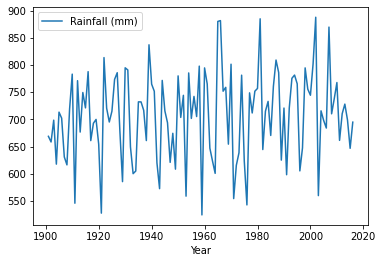

In [41]:
rainfall_df.loc[rainfall_df['Country'] == 'Germany'].groupby('Year').mean().plot()
plt.show()

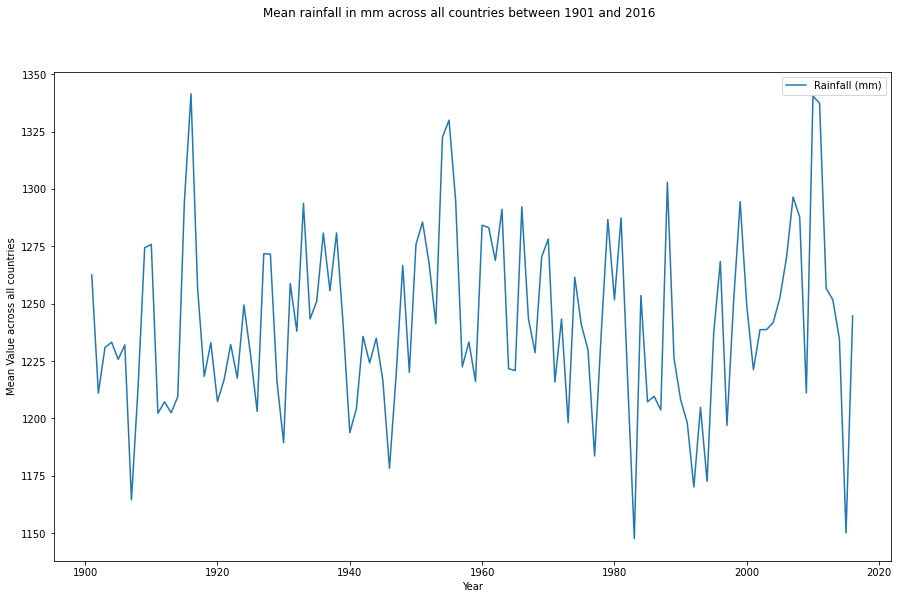

In [42]:
# prepare data
temp_data = rainfall_df.groupby('Year').mean()

# plot data
fig, ax = plt.subplots(figsize=(15,9))
fig.suptitle('Mean rainfall in mm across all countries between 1901 and 2016')

temp_data.plot(ax=ax)

ax.set_ylabel('Mean Value across all countries')
ax.set_xlabel('Year')

plt.show()

## Temperature data

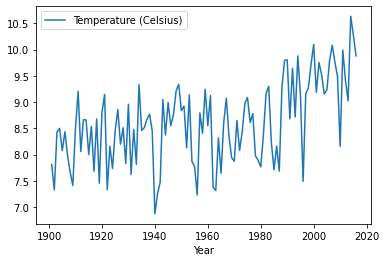

In [43]:
temperature_df.loc[temperature_df['Country'] == 'Germany'].groupby('Year').mean().plot()
plt.show()

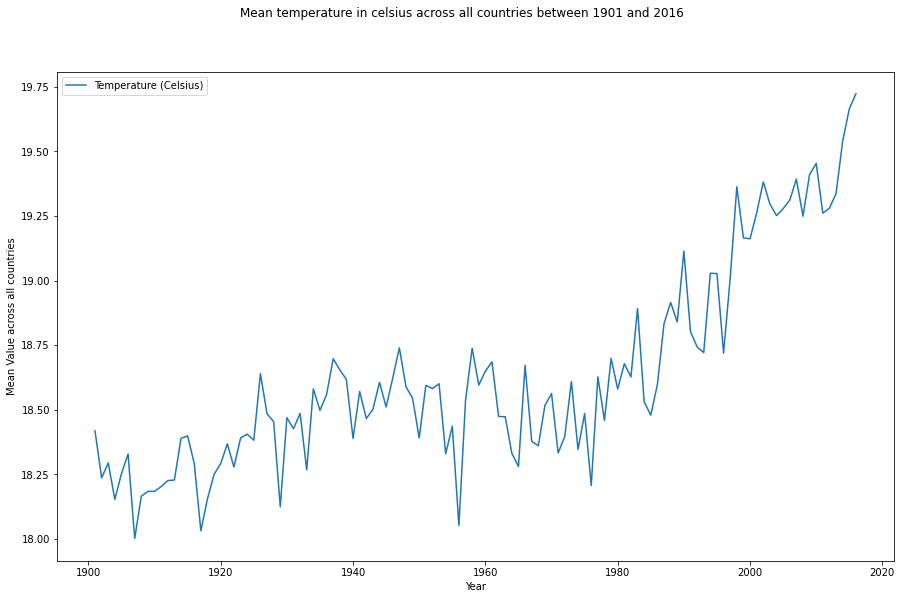

In [44]:
# prepare data
temp_data = temperature_df.groupby('Year').mean()

# plot data
fig, ax = plt.subplots(figsize=(15,9))
fig.suptitle('Mean temperature in celsius across all countries between 1901 and 2016')

temp_data.plot(ax=ax)

ax.set_ylabel('Mean Value across all countries')
ax.set_xlabel('Year')

plt.show()

## Yield data

In [45]:
yield_data.loc[(yield_data['Year'] == 1990)].groupby(['Year', 'Item']).mean().max()

Value    151143.167939
dtype: float64

In [46]:
yield_data.loc[(yield_data['Year'] == 1990) & (yield_data['Value'] > 3000000)].groupby(['Year', 'Item']).mean()

,,Value
Year,Item,


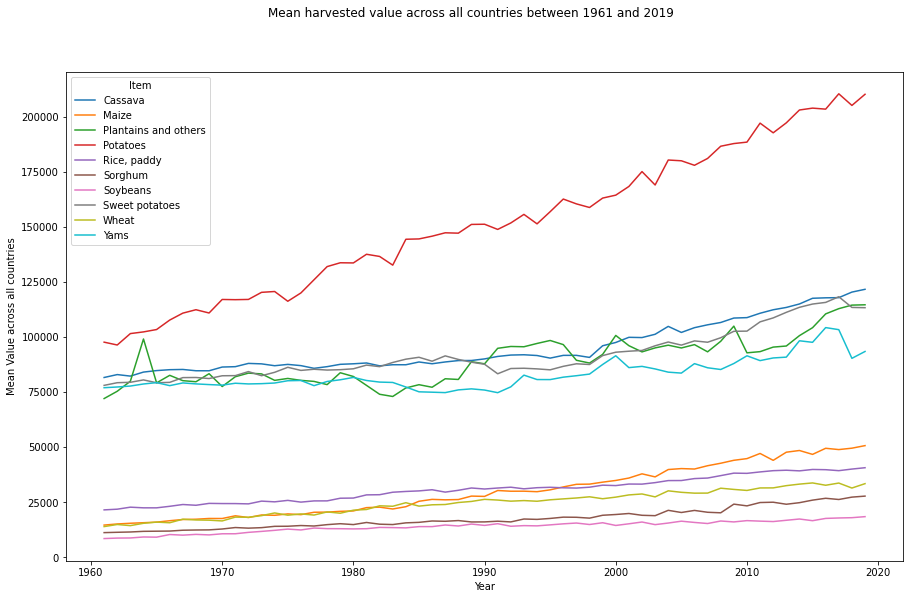

In [47]:
# prepare data
yield_mean = yield_data.groupby(['Year', 'Item']).mean()

# plot data
fig, ax = plt.subplots(figsize=(15,9))
fig.suptitle('Mean harvested value across all countries between 1961 and 2019')

yield_mean['Value'].unstack().plot(ax=ax)

ax.set_ylabel('Mean Value across all countries')
ax.set_xlabel('Year')

plt.show()

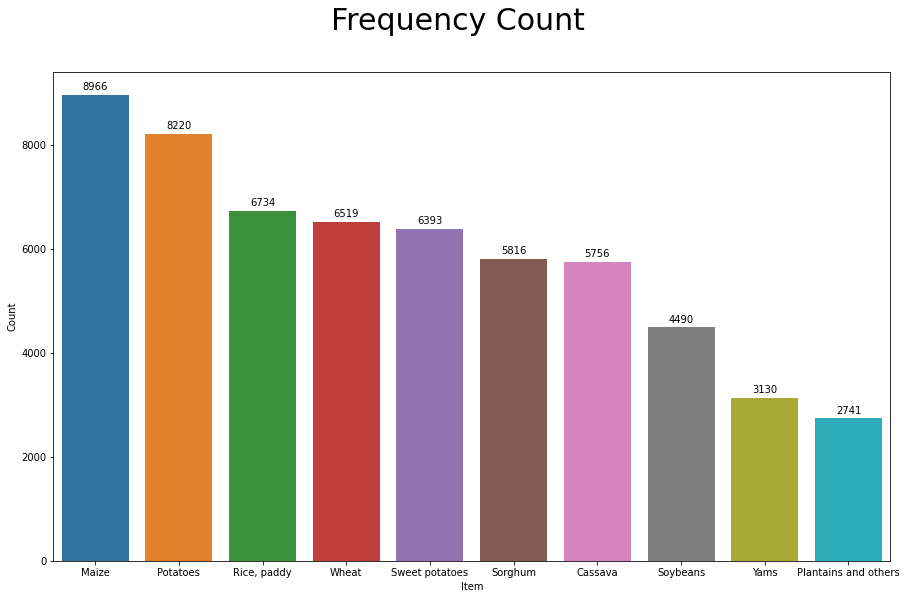

In [48]:
fig, axs = plt.subplots(1,1, figsize=(15,9))
fig.suptitle('Frequency Count', size=30)

temp_df = yield_data['Item'].value_counts().to_frame().reset_index()
g = sns.barplot(x='index', y='Item', data=temp_df, orient='v', ax=axs)

for index, row in temp_df.iterrows():
    g.text(row.name,row.Item + 100, row.Item, color='black', ha="center")

axs.set_xlabel('Item')
axs.set_ylabel('Count')

fig.show()

## Pesticide data

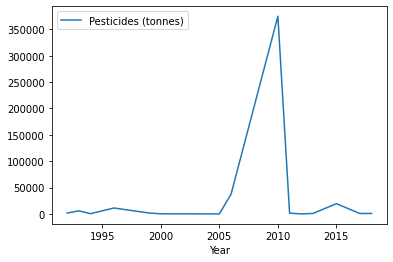

In [49]:
pesticides_df.loc[temperature_df['Country'] == 'Germany'].groupby('Year').mean().plot()
plt.show()

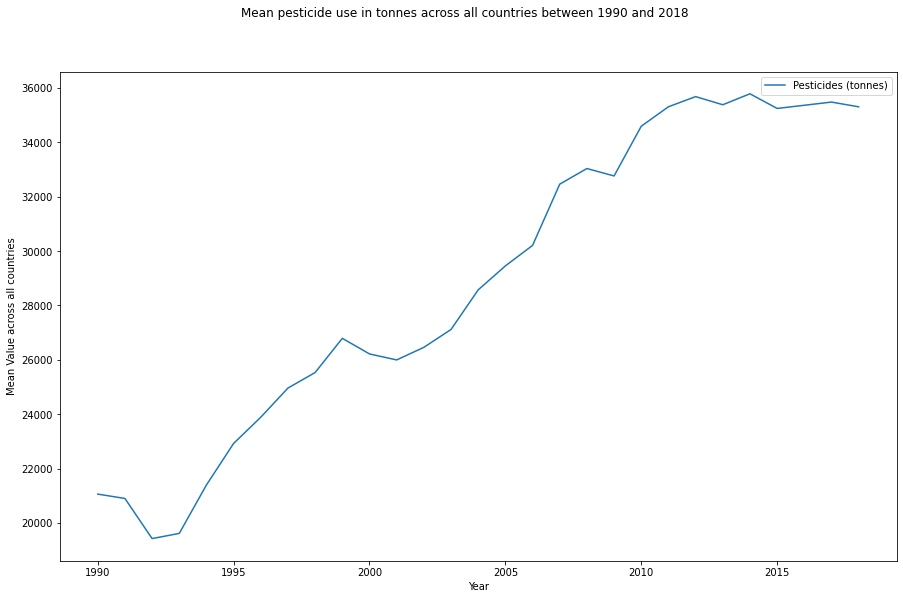

In [50]:
# prepare data
temp_data = pesticides_df.groupby('Year').mean()

# plot data
fig, ax = plt.subplots(figsize=(15,9))
fig.suptitle('Mean pesticide use in tonnes across all countries between 1990 and 2018')

temp_data.plot(ax=ax)

ax.set_ylabel('Mean Value across all countries')
ax.set_xlabel('Year')

plt.show()

## Merged data

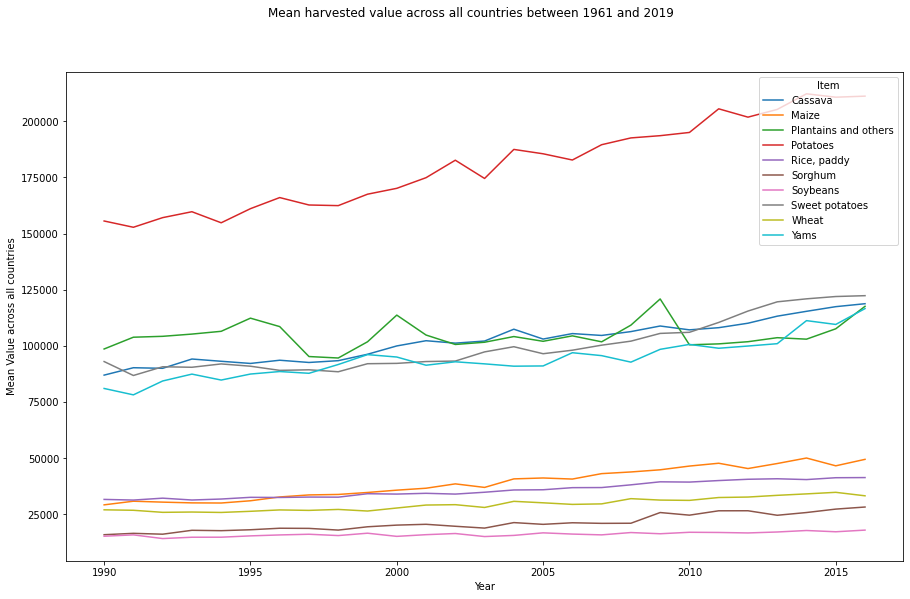

In [51]:
# prepare data
temp_data = data.groupby(['Year', 'Item']).mean()

# plot data
fig, ax = plt.subplots(figsize=(15,9))
fig.suptitle('Mean harvested value across all countries between 1961 and 2019')

temp_data['Yield (hg/ha)'].unstack().plot(ax=ax)

ax.set_ylabel('Mean Value across all countries')
ax.set_xlabel('Year')

plt.show()

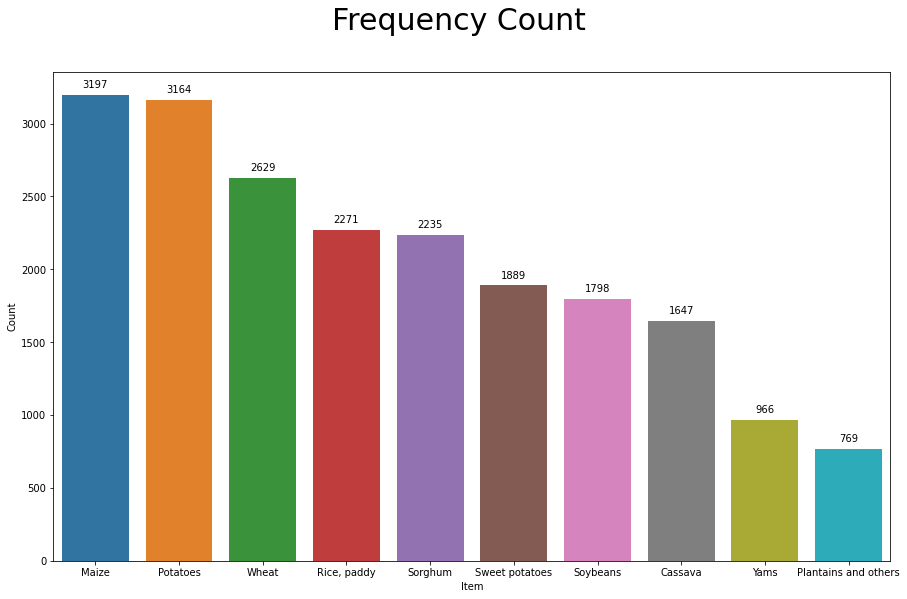

In [52]:
fig, axs = plt.subplots(1,1, figsize=(15,9))
fig.suptitle('Frequency Count', size=30)

temp_df = data['Item'].value_counts().to_frame().reset_index()
g = sns.barplot(x='index', y='Item', data=temp_df, orient='v', ax=axs)

for index, row in temp_df.iterrows():
    g.text(row.name,row.Item + 50, row.Item, color='black', ha="center")

axs.set_xlabel('Item')
axs.set_ylabel('Count')

fig.show()

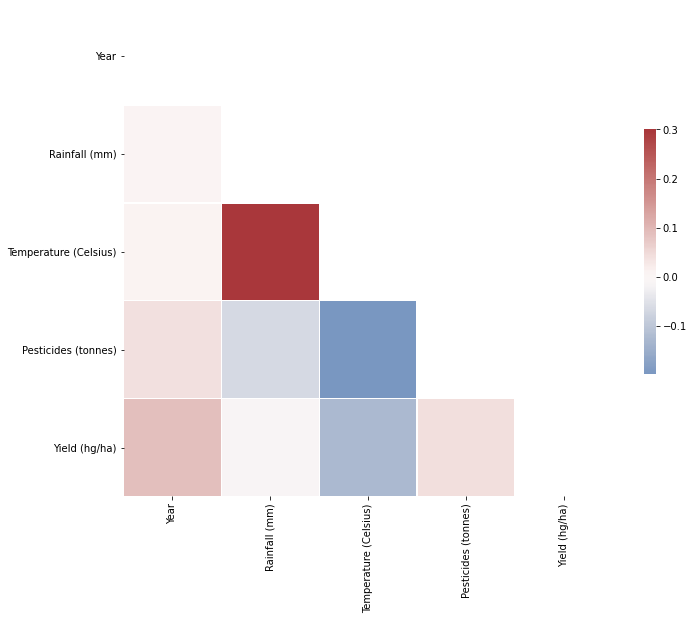

In [53]:
corr = data.select_dtypes(include=[np.number]).corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.palette="vlag"

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

## brauchen wir das noch

In [54]:
data.groupby('Item').count()

,Year,Country,Rainfall (mm),Temperature (Celsius),Pesticides (tonnes),Yield (hg/ha)
Item,,,,,,
Cassava,1647,1647,1647,1647,1647,1647
Maize,3197,3197,3197,3197,3197,3197
Plantains and others,769,769,769,769,769,769
Potatoes,3164,3164,3164,3164,3164,3164
"Rice, paddy",2271,2271,2271,2271,2271,2271
Sorghum,2235,2235,2235,2235,2235,2235
Soybeans,1798,1798,1798,1798,1798,1798
Sweet potatoes,1889,1889,1889,1889,1889,1889
Wheat,2629,2629,2629,2629,2629,2629


In [55]:
data.groupby(['Country'],sort=True)['Yield (hg/ha)'].sum().nlargest(25)

Country
Japan          24385646
Jamaica        23367356
Australia      22170578
Egypt          22044721
Belize         21176279
New Zealand    20851881
El Salvador    20028555
Argentina      19670482
Mexico         19499783
China          19469860
Italy          19142128
Guatemala      19129721
Israel         18998549
Spain          18827270
France         18603730
Brazil         18495090
Costa Rica     18218097
Mali           18182173
Peru           18126231
Suriname       17809152
India          17610164
Greece         17470917
Kenya          17213164
Netherlands    16578361
Jordan         16390587
Name: Yield (hg/ha), dtype: int64

In [56]:
data.groupby(['Item','Country'],sort=True)['Yield (hg/ha)'].sum().nlargest(25)

Item                  Country     
Potatoes              New Zealand     11962908
                      Netherlands     11683260
                      France          10782564
                      Switzerland     10696290
                      Germany         10592201
                      Denmark         10509400
                      Australia        9152736
                      Israel           9115743
                      Kuwait           9041794
                      Ireland          8712595
                      Sweden           8596094
                      Japan            8401024
                      South Africa     8233546
                      Austria          7935598
                      Belgium          7651768
Plantains and others  Guatemala        7593910
Cassava               India            7533263
Potatoes              Jordan           7505152
Plantains and others  Belize           7451019
Sweet potatoes        Australia        7430896
Potatoes              Tur

# Data Preprocessing

## One Hot Encoding

In [57]:
data.shape

(20565, 7)

In [58]:
from sklearn.preprocessing import OneHotEncoder

df_onehot = pd.get_dummies(data, columns=['Country', 'Item'], prefix=['Country', 'Item'])
data = df_onehot.loc[:, df_onehot.columns != 'Yield (hg/ha)']
data['Yield (hg/ha)'] = df_onehot['Yield (hg/ha)']

In [59]:
data.shape

(20565, 152)

## Backward Elimination

In [60]:
data.shape

(20565, 152)

In [61]:
import statsmodels.api as sm

y = data['Yield (hg/ha)']
X = data.drop('Yield (hg/ha)', axis=1)

cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p = []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:], index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break

data = data[cols]
data.insert(len(data.columns), 'Yield (hg/ha)', y)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [62]:
data.shape

(20565, 132)

## Removing of Outliers

In [63]:
data.shape

(20565, 132)

In [64]:
from scipy import stats

y = data['Yield (hg/ha)']
X = data.drop('Yield (hg/ha)', axis=1)

z_scores = stats.zscore(X)
abs_z_scores = np.abs(z_scores)

filtered_entries = (abs_z_scores < 15).all(axis=1)
X = X[filtered_entries]

X.insert(len(X.columns), 'Yield (hg/ha)', y)
data = X

In [65]:
data.shape

(19267, 132)

## Feature Scaling

In [66]:
data.shape

(19267, 132)

In [67]:
from sklearn.preprocessing import MinMaxScaler

y = data['Yield (hg/ha)']
X = data.drop('Yield (hg/ha)', axis=1)

scaler = MinMaxScaler()
data_without_yield = pd.DataFrame(scaler.fit_transform(X), index=y.index)
data_without_yield.columns = X.columns
data_without_yield.insert(len(data_without_yield.columns), 'Yield (hg/ha)', y)

data = data_without_yield

In [68]:
data.shape

(19267, 132)

# Modeling

In [69]:
y = data['Yield (hg/ha)']
X = data.drop('Yield (hg/ha)', axis=1)

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [72]:
def plot_regression_results(ax, y_test, y_pred, title, estimated_time, scores):

  # linear least-squares
  slope, intercept, rvalue, pvalue, stderr = linregress(y_test, y_pred)
  ax.plot([y_test.min(), y_test.max()], [intercept+y_test.min()*slope, intercept+y_test.max()*slope], '--r')

  ax.scatter(y_test, y_pred, alpha=0.7)

  # Anzeigen der Werte in einer Box
  extra = plt.Rectangle((0, 0), 0, 0, fc="w", fill=False,
                          edgecolor='none', linewidth=0)
  ax.legend([extra], [scores], loc='upper left')

  ax.set_xlabel('Actual values in tonnes')
  ax.set_ylabel('Predictes values in tonnes')
  ax.set_title('{}\nTrained in {:.2f} Milliseconds'.format(name, estimated_time*1000))

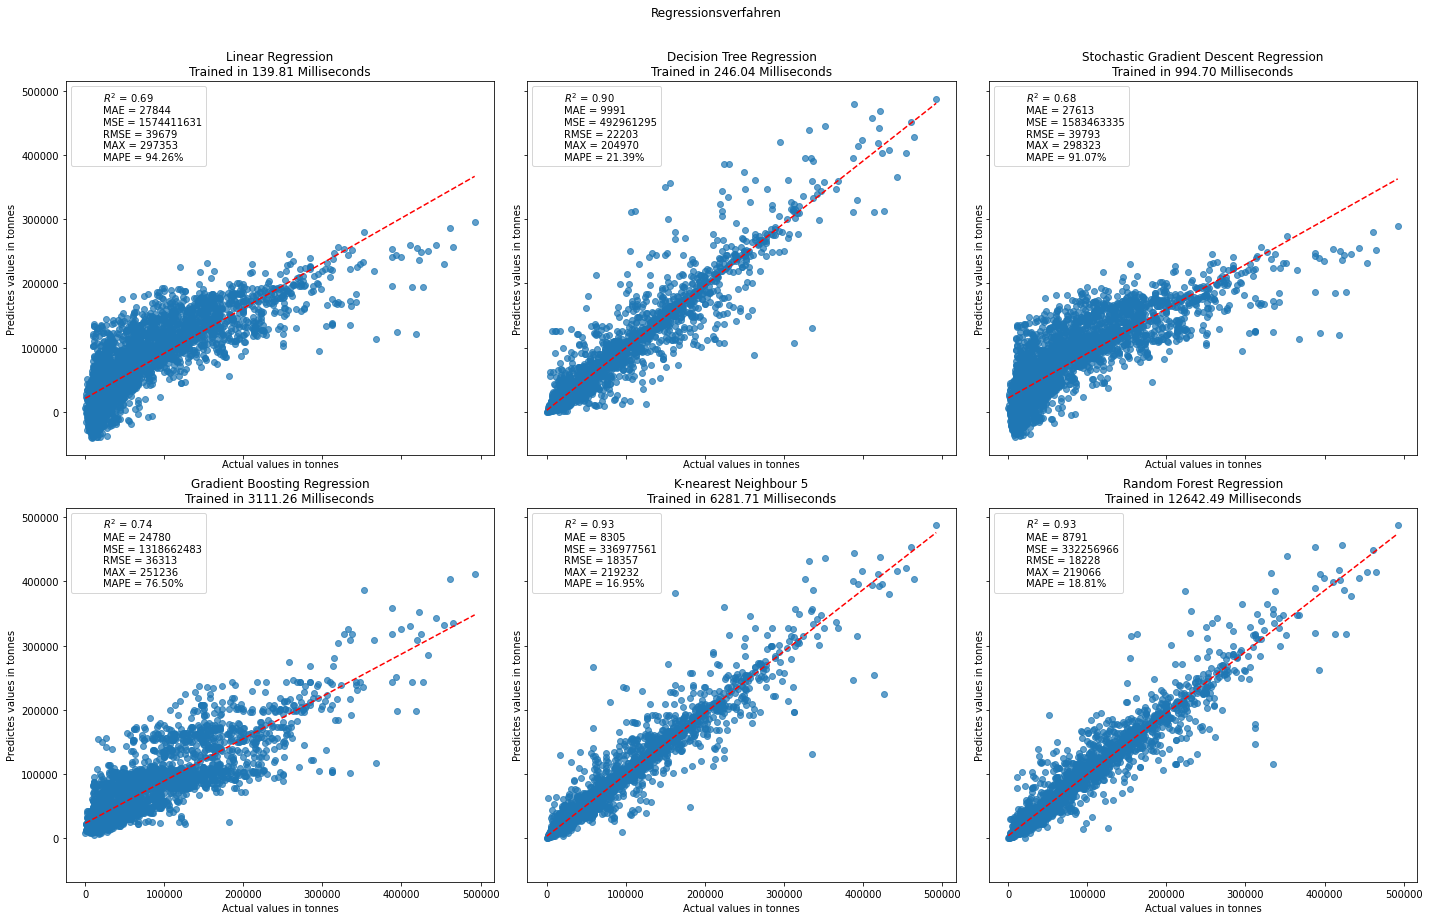

In [73]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, max_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor

import time
from scipy.stats import linregress

lin = LinearRegression()
dtr = DecisionTreeRegressor()
sgd = SGDRegressor(loss='squared_loss')
gbr = GradientBoostingRegressor()
knn = KNeighborsRegressor(n_neighbors=5)
rfr = RandomForestRegressor()

# Verwendete Regressionen
estimators = [('Linear Regression', lin),
              ('Decision Tree Regression', dtr),
              ('Stochastic Gradient Descent Regression', sgd),
              ('Gradient Boosting Regression', gbr),
              ('K-nearest Neighbour 5', knn),
              ('Random Forest Regression', rfr)]

# Festlegen des Subplots
fig, axs = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(20, 13))
axs = np.ravel(axs)

for ax, (name, est) in zip(axs, estimators):
  start_time = time.time()
  # Trainieren des Modelles
  est.fit(X_train, y_train)
  y_pred = est.predict(X_test)
  estimated_time = time.time() - start_time

  # Anzeigen des Modelles
  plot_regression_results(ax, y_test, y_pred, name, estimated_time, 
                          (r'$R^2$ = {:.2f}' + '\n' + 
                          r'MAE = {:.0f}' + '\n' +
                          r'MSE = {:.0f}' + '\n' +
                          r'RMSE = {:.0f}' + '\n' +
                          r'MAX = {:.0f}' + '\n' +
                          r'MAPE = {:.2f}%')
                          .format(r2_score(y_test, y_pred),
                                  mean_absolute_error(y_test, y_pred),
                                  mean_squared_error(y_test, y_pred),
                                  mean_squared_error(y_test, y_pred, squared=False),
                                  max_error(y_test, y_pred),
                                  mean_absolute_percentage_error(y_test, y_pred)))
  
plt.suptitle('Regressionsverfahren')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

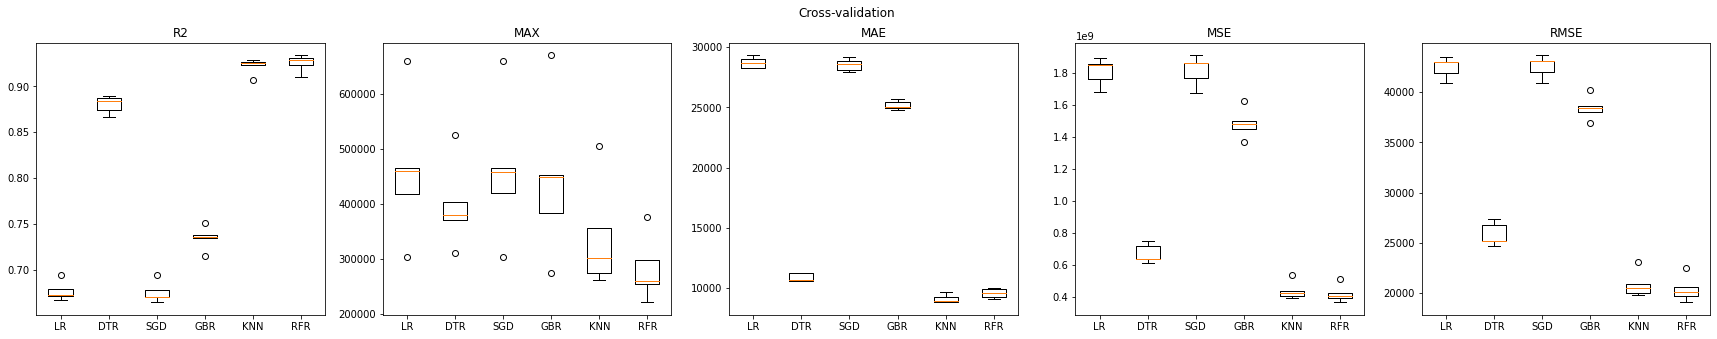

In [74]:
r2_values = []
max_error_values = []
neg_mean_absolute_error_values = []
neg_mean_squared_error_values = []
neg_root_mean_squared_error_values = []

for name, est in estimators:
  # Kreuzvalidierung
  score = cross_validate(est, X_train, y_train, cv=5,
                         scoring=['r2', 'max_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error'],
                         n_jobs=-1)

  # Abspeichern der Werte
  r2_values.append(score['test_r2'])
  max_error_values.append(-score['test_max_error'])
  neg_mean_absolute_error_values.append(-score['test_neg_mean_absolute_error'])
  neg_mean_squared_error_values.append(-score['test_neg_mean_squared_error'])
  neg_root_mean_squared_error_values.append(-score['test_neg_root_mean_squared_error'])

# Plotten der Werte
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(30, 5))

names = ['LR', 'DTR', 'SGD', 'GBR', 'KNN', 'RFR']

axs[0].boxplot(r2_values, labels=names)
axs[0].set_title('R2')
axs[1].boxplot(max_error_values, labels=names)
axs[1].set_title('MAX')
axs[2].boxplot(neg_mean_absolute_error_values, labels=names)
axs[2].set_title('MAE')
axs[3].boxplot(neg_mean_squared_error_values, labels=names)
axs[3].set_title('MSE')
axs[4].boxplot(neg_root_mean_squared_error_values, labels=names)
axs[4].set_title('RMSE')

plt.suptitle('Cross-validation')
plt.show()

In [75]:
regression = 5

print(u'R²: {:.3f} \u00B1 {:.3f}'.format(np.mean(r2_values[regression]), np.std(r2_values[regression])))
print(u'MAX: {:,.0f} \u00B1 {:,.0f}'.format(np.mean(max_error_values[regression]), np.std(max_error_values[regression])))
print(u'MAE: {:,.0f} \u00B1 {:,.0f}'.format(np.mean(neg_mean_absolute_error_values[regression]), np.std(neg_mean_absolute_error_values[regression])))
print(u'MSE: {:,.0f} \u00B1 {:,.0f}'.format(np.mean(neg_mean_squared_error_values[regression]), np.std(neg_mean_squared_error_values[regression])))
print(u'RMSE: {:,.0f} \u00B1 {:,.0f}'.format(np.mean(neg_root_mean_squared_error_values[regression]), np.std(neg_root_mean_squared_error_values[regression])))

R²: 0.925 ± 0.008
MAX: 281,655 ± 53,191
MAE: 9,590 ± 347
MSE: 417,638,873 ± 49,351,473
RMSE: 20,402 ± 1,179


https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

In [76]:
#from sklearn.tree import export_graphviz
#import pydot

#tree = rfr.estimators_[5]

#export_graphviz(tree, out_file = 'tree.dot', feature_names = data.columns[:-1], rounded = True, precision = 1)
# Use dot file to create a graph
#(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
#graph.write_png('tree.png')